In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns





|      | AR(p)                | MA(q)                | ARMA(p,q) |
|------|----------------------|----------------------|-----------|
| ACF  | Tails off            | Cuts off after lag q | Tails off |
| PACF | Cuts off after lag p | Tails off            | Tails off |

<br>

In [19]:
df = pd.read_csv('.//download.csv', parse_dates=True, index_col=[0])
df = df.asfreq('d')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2013-01-01 to 2015-09-27
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1000 non-null   float64
dtypes: float64(1)
memory usage: 15.6 KB


In [20]:
df.head()

,y
2013-01-01,1.624345
2013-01-02,-0.936625
2013-01-03,0.081483
2013-01-04,-0.663558
2013-01-05,0.738023


In [21]:
earthquake = pd.read_csv('.//earthquakes.csv', usecols=['date', 'earthquakes_per_year'], parse_dates=['date'], index_col=[0])
display(earthquake.head())

,earthquakes_per_year
date,
1900-01-01,13.0
1901-01-01,14.0
1902-01-01,8.0
1903-01-01,10.0
1904-01-01,16.0


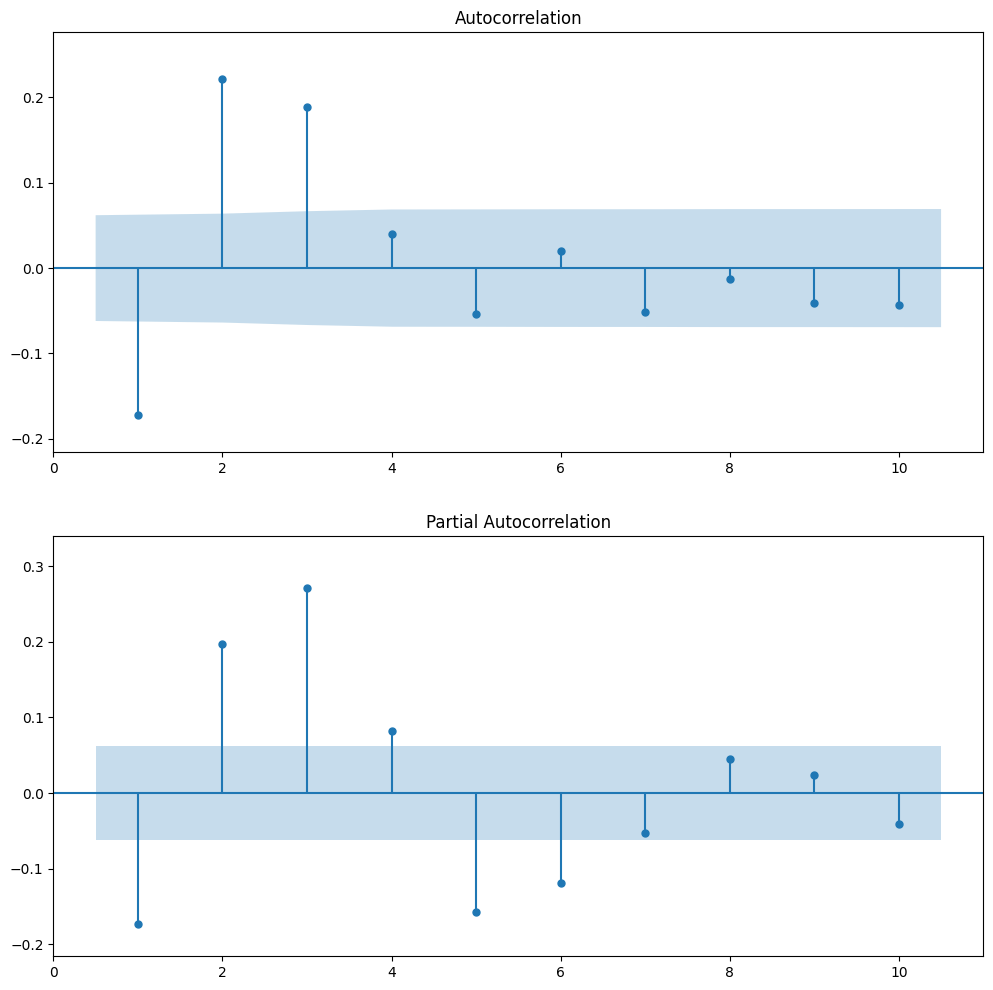

In [22]:
# Import
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))

# Plot the ACF of df
plot_acf(df, lags=10, zero=False, ax=ax1, auto_ylims=True)

# Plot the PACF of df
plot_pacf(df, lags=10, zero=False, ax=ax2, auto_ylims=True)

plt.show()

In [23]:
display(earthquake.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 99 entries, 1900-01-01 to 1998-01-01
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   earthquakes_per_year  99 non-null     float64
dtypes: float64(1)
memory usage: 1.5 KB


None

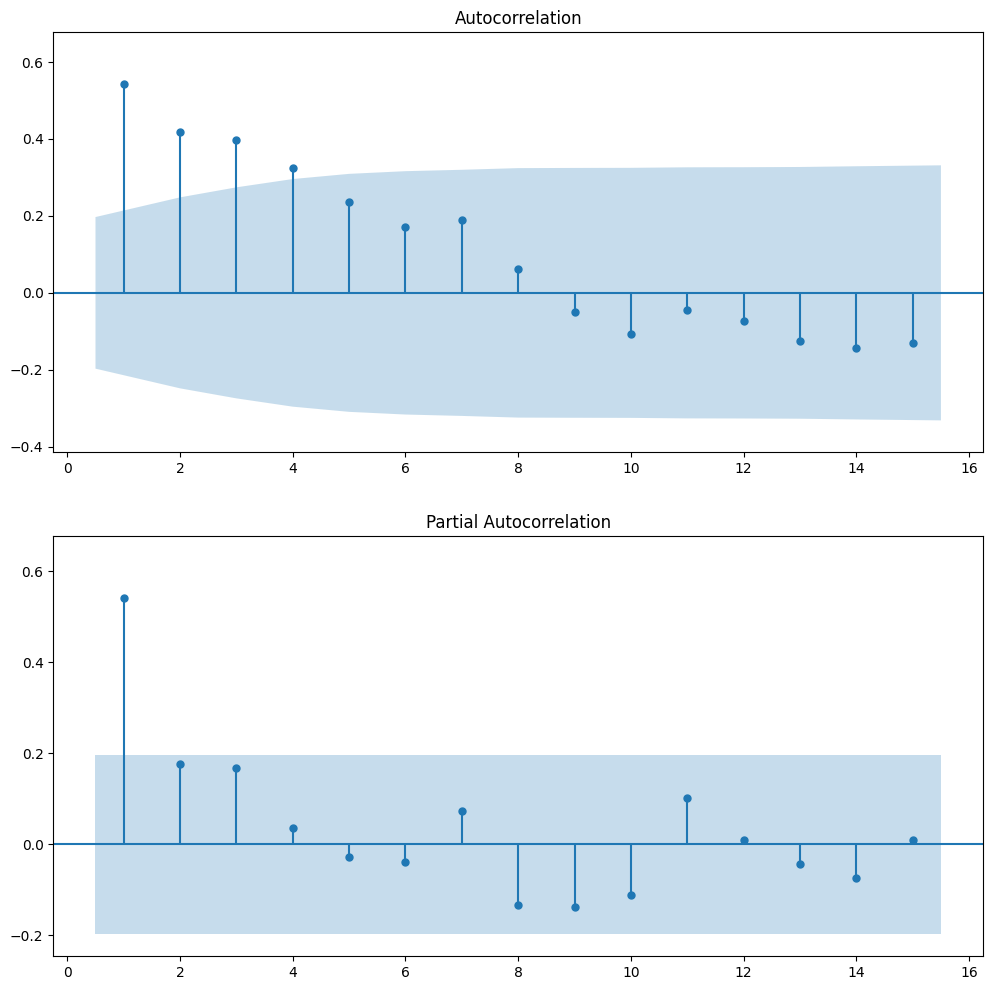

In [24]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,12))

# Plot ACF and PACF
plot_acf(earthquake, lags=15, zero=False, ax=ax1, auto_ylims=True)
plot_pacf(earthquake, lags=15, zero=False, ax=ax2, auto_ylims=True)

# Show plot
plt.show()

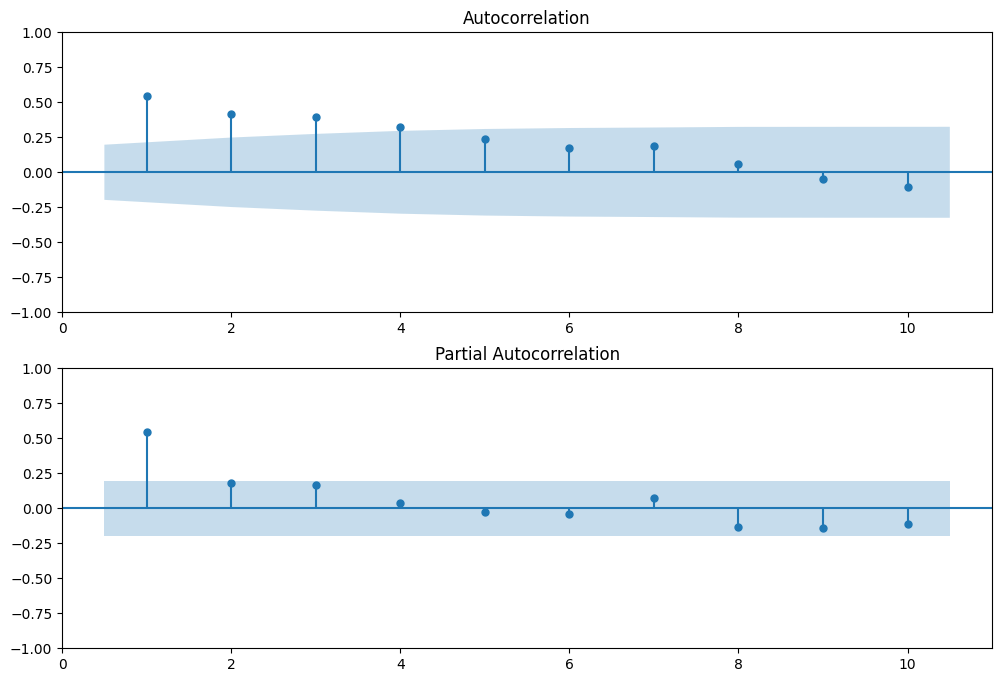

c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF and PACF
plot_acf(earthquake, lags=10, zero=False, ax=ax1)
plot_pacf(earthquake, lags=10, zero=False, ax=ax2)

# Show plot
plt.show()

# Instantiate model
model = SARIMAX(earthquake, order=(1, 0, 0))

# Train model
results = model.fit()

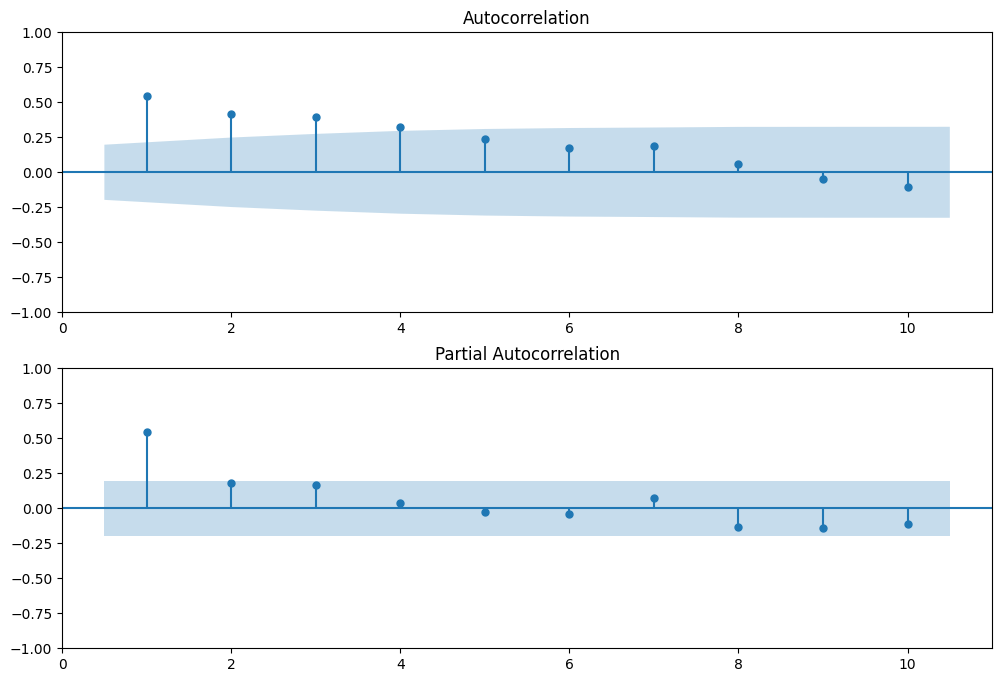

c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF and PACF
plot_acf(earthquake, lags=10, zero=False, ax=ax1)
plot_pacf(earthquake, lags=10, zero=False, ax=ax2)

# Show plot
plt.show()

# Instantiate model
model = ARIMA(earthquake, order=(1, 0, 0))

# Train model
results = model.fit()

In [27]:
df = pd.read_csv('.//df_500.csv', parse_dates=True, index_col=[0])
df = df.asfreq('d')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 500 entries, 2013-01-01 to 2014-05-15
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       500 non-null    float64
dtypes: float64(1)
memory usage: 7.8 KB


In [28]:
# Create empty list to store search results
order_aic_bic=[]

# Loop over p values from 0-2
for p in range(3):
    # Loop over q values from 0-2
    for q in range(3):
        # Create and fit ARMA(p, q) model
        model = SARIMAX(df, order=(p, 0, q))
        results = model.fit()
        
        # Append aorder and results tuple
        order_aic_bic.append((p, q, results.aic, results.bic))

In [29]:
# Create empty list to store search results
order_aic_bic=[]

# Loop over p values from 0-2
for p in range(3):
    # Loop over q values from 0-2
    for q in range(3):
        # Create and fit ARMA(p, q) model
        model = ARIMA(df, order=(p, 0, q))
        results = model.fit()
        
        # Append aorder and results tuple
        order_aic_bic.append((p, q, results.aic, results.bic))

In [30]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

   p  q          AIC          BIC
7  2  1  1414.536020  1435.609061
8  2  2  1416.431334  1441.718983
5  1  2  1417.892129  1438.965169
6  2  0  1419.066942  1435.925374
2  0  2  1426.020087  1442.878519
4  1  1  1428.927060  1445.785492
1  0  1  1430.656368  1443.300193
3  1  0  1498.437872  1511.081696
0  0  0  1615.197537  1623.626753
   p  q          AIC          BIC
7  2  1  1414.536020  1435.609061
6  2  0  1419.066942  1435.925374
5  1  2  1417.892129  1438.965169
8  2  2  1416.431334  1441.718983
2  0  2  1426.020087  1442.878519
1  0  1  1430.656368  1443.300193
4  1  1  1428.927060  1445.785492
3  1  0  1498.437872  1511.081696
0  0  0  1615.197537  1623.626753


In [31]:
# Loop over p values from 0-2
for p in range(3):
    for q in range(3):
        try:
            # Create and fit ARMA(p, q) model
            model = SARIMAX(earthquake, order=(p, 0, q))
            results = model.fit()
            
            # Print order and results
            print(p, q, results.aic, results.bic)
            
        except:
            print(p, q, None, None)    

c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppDa

0 0 888.4297722924081 891.0248921425426
0 1 799.6741727812265 804.8644124814957
0 2 761.0674787503887 768.8528383007924
1 0 666.6455255041615 671.8357652044307
1 1 647.1322999673815 654.9176595177853
1 2 648.7385664620732 659.1190458626115
2 0 656.0283744146396 663.8137339650434
2 1 648.8428399959452 659.2233193964835
2 2 648.8506443428662 661.8262435935392


c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_da

In [32]:
# Loop over p values from 0-2
for p in range(3):
    for q in range(3):
        try:
            # Create and fit ARMA(p, q) model
            model = ARIMA(earthquake, order=(p, 0, q))
            results = model.fit()
            
            # Print order and results
            print(p, q, results.aic, results.bic)
            
        except:
            print(p, q, None, None)    

c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppDa

0 0 676.5443594984636 681.7345991987328
0 1 654.8468586200252 662.6322181704289
0 2 651.7332270518992 662.1137064524376
1 0 643.9676770992022 651.753036649606
1 1 640.4562835911977 650.836762991736
1 2 642.3808673565711 655.3564666072441
2 0 642.7338539385339 653.1143333390722
2 1 647.4406643960186 660.4162636466916


c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregres

2 2 642.4685896289844 658.039308729792


c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


4.56898829488138


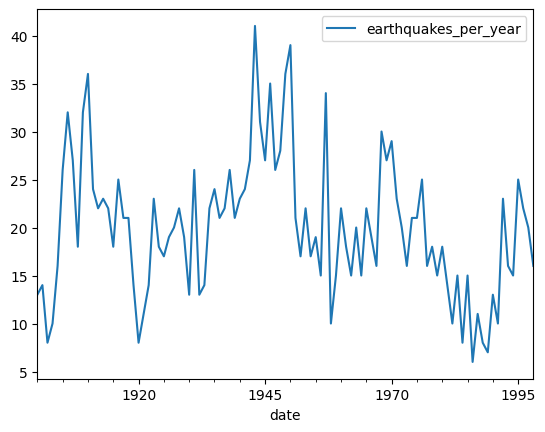

In [33]:
# Fit model
model = ARIMA(earthquake, order=(1,0,1))
results = model.fit()

# # Fit model
# model = SARIMAX(earthquake, order=(1, 0, 1))
# results = model.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(results.resid))

# Print mean absolute error
print(mae)

# Make plot of time series for comparison
earthquake.plot()
plt.show()

4.7556256695276415


c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


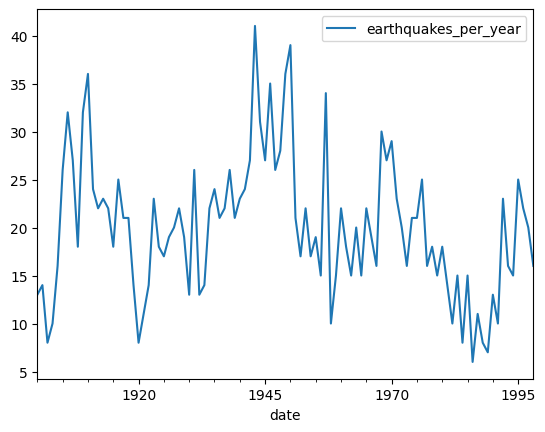

In [34]:
# Fit model
# model = ARIMA(earthquake, order=(1,0,1))
# results = model.fit()

# # Fit model
model = SARIMAX(earthquake, order=(1, 0, 1))
results = model.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(results.resid))

# Print mean absolute error
print(mae)

# Make plot of time series for comparison
earthquake.plot()
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 400 entries, 2013-01-01 to 2014-02-04
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       400 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


array([[<Axes: title={'center': 'y'}>]], dtype=object)

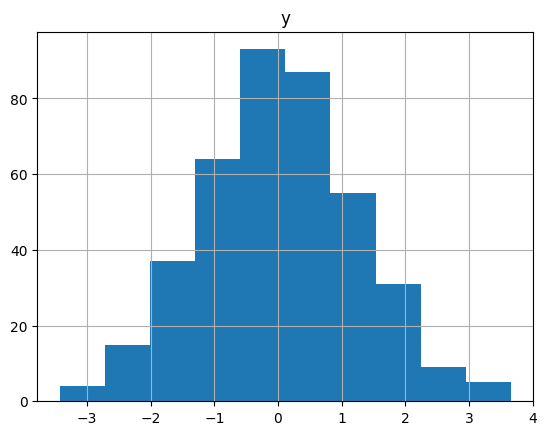

In [37]:
df = pd.read_csv('.//df_400.csv', parse_dates=True, index_col=[0])
df = df.asfreq('d')
df.info()
df.hist()

In [36]:
# Create and fit model
# model1 = SARIMAX(df, order=(3, 0, 1))
model1 = ARIMA(df, order=(3, 0, 1))
results1 = model1.fit()

# Print summary
print(results1.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  400
Model:                 ARIMA(3, 0, 1)   Log Likelihood                -555.394
Date:                Mon, 27 Nov 2023   AIC                           1122.787
Time:                        10:18:58   BIC                           1146.736
Sample:                    01-01-2013   HQIC                          1132.272
                         - 02-04-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0314      0.030      1.060      0.289      -0.027       0.090
ar.L1          0.0163      0.109      0.150      0.881      -0.197       0.230
ar.L2          0.2159      0.052      4.179      0.0

In [38]:
# Create and fit model
model1 = SARIMAX(df, order=(3, 0, 1))
# model1 = ARIMA(df, order=(3, 0, 1))
results1 = model1.fit()

# Print summary
print(results1.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  400
Model:               SARIMAX(3, 0, 1)   Log Likelihood                -555.968
Date:                Mon, 27 Nov 2023   AIC                           1121.936
Time:                        10:20:39   BIC                           1141.893
Sample:                    01-01-2013   HQIC                          1129.839
                         - 02-04-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0096      0.109      0.089      0.929      -0.203       0.223
ar.L2          0.2150      0.052      4.152      0.000       0.114       0.317
ar.L3         -0.4525      0.051     -8.948      0.0

In [39]:
# Create and fit model
model2 = SARIMAX(df, order=(2, 0, 0))
results2 = model2.fit()

# Print summary
print(results2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  400
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -591.188
Date:                Mon, 27 Nov 2023   AIC                           1188.377
Time:                        10:22:15   BIC                           1200.351
Sample:                    01-01-2013   HQIC                          1193.119
                         - 02-04-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3072      0.047     -6.545      0.000      -0.399      -0.215
ar.L2          0.2675      0.045      5.985      0.000       0.180       0.355
sigma2         1.1243      0.082     13.732      0.0

In [41]:
# Create and fit model
model2 = ARIMA(df, order=(2, 0, 0))
results2 = model2.fit()

# Print summary
print(results2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  400
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -590.964
Date:                Mon, 27 Nov 2023   AIC                           1189.928
Time:                        10:22:31   BIC                           1205.894
Sample:                    01-01-2013   HQIC                          1196.251
                         - 02-04-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0341      0.051      0.662      0.508      -0.067       0.135
ar.L1         -0.3082      0.047     -6.554      0.000      -0.400      -0.216
ar.L2          0.2664      0.045      5.981      0.0

In [42]:
df = pd.read_csv('.//df_300.csv', parse_dates=True, index_col=[0])
df = df.asfreq('d')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 300 entries, 2013-01-01 to 2013-10-27
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       300 non-null    float64
dtypes: float64(1)
memory usage: 4.7 KB


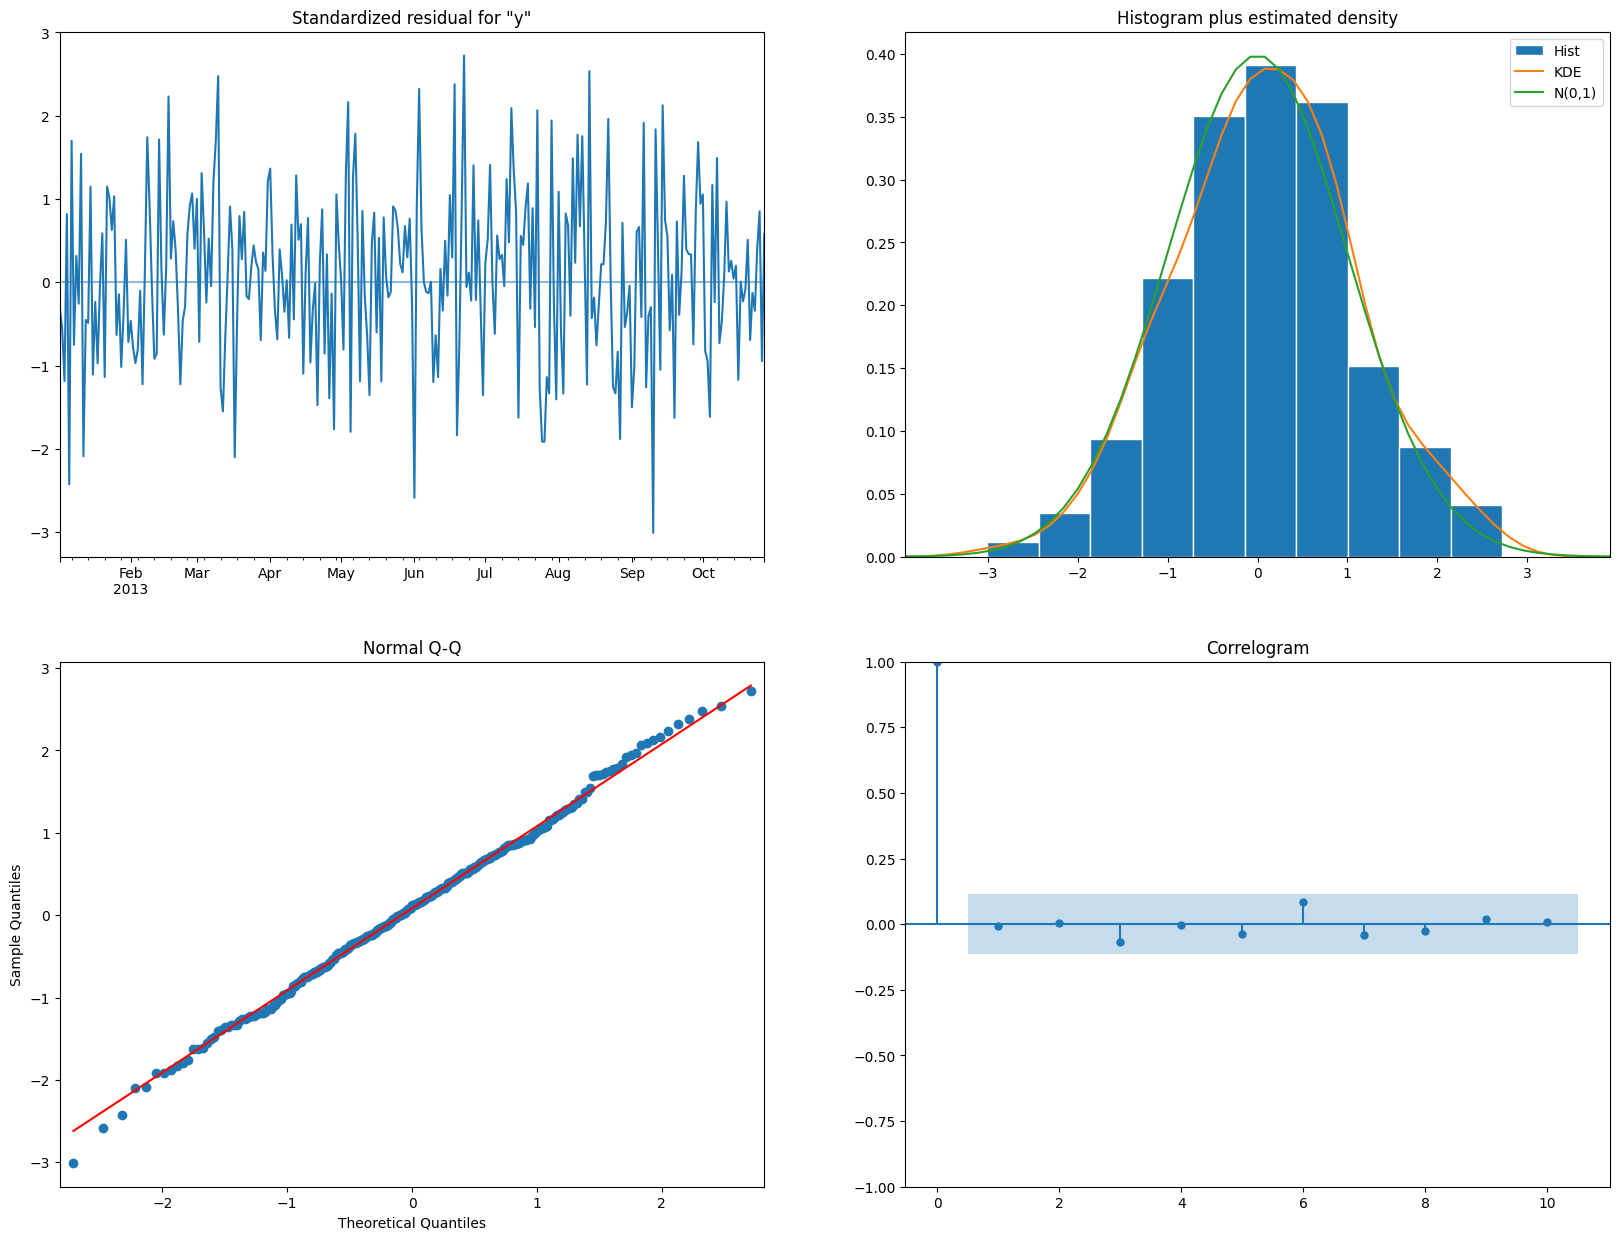

In [43]:
# Create and fit model
model = SARIMAX(df, order=(1, 1, 1))
results=model.fit()

# Create the 4 diagostics plots
results.plot_diagnostics(figsize=(20, 15))
plt.show()


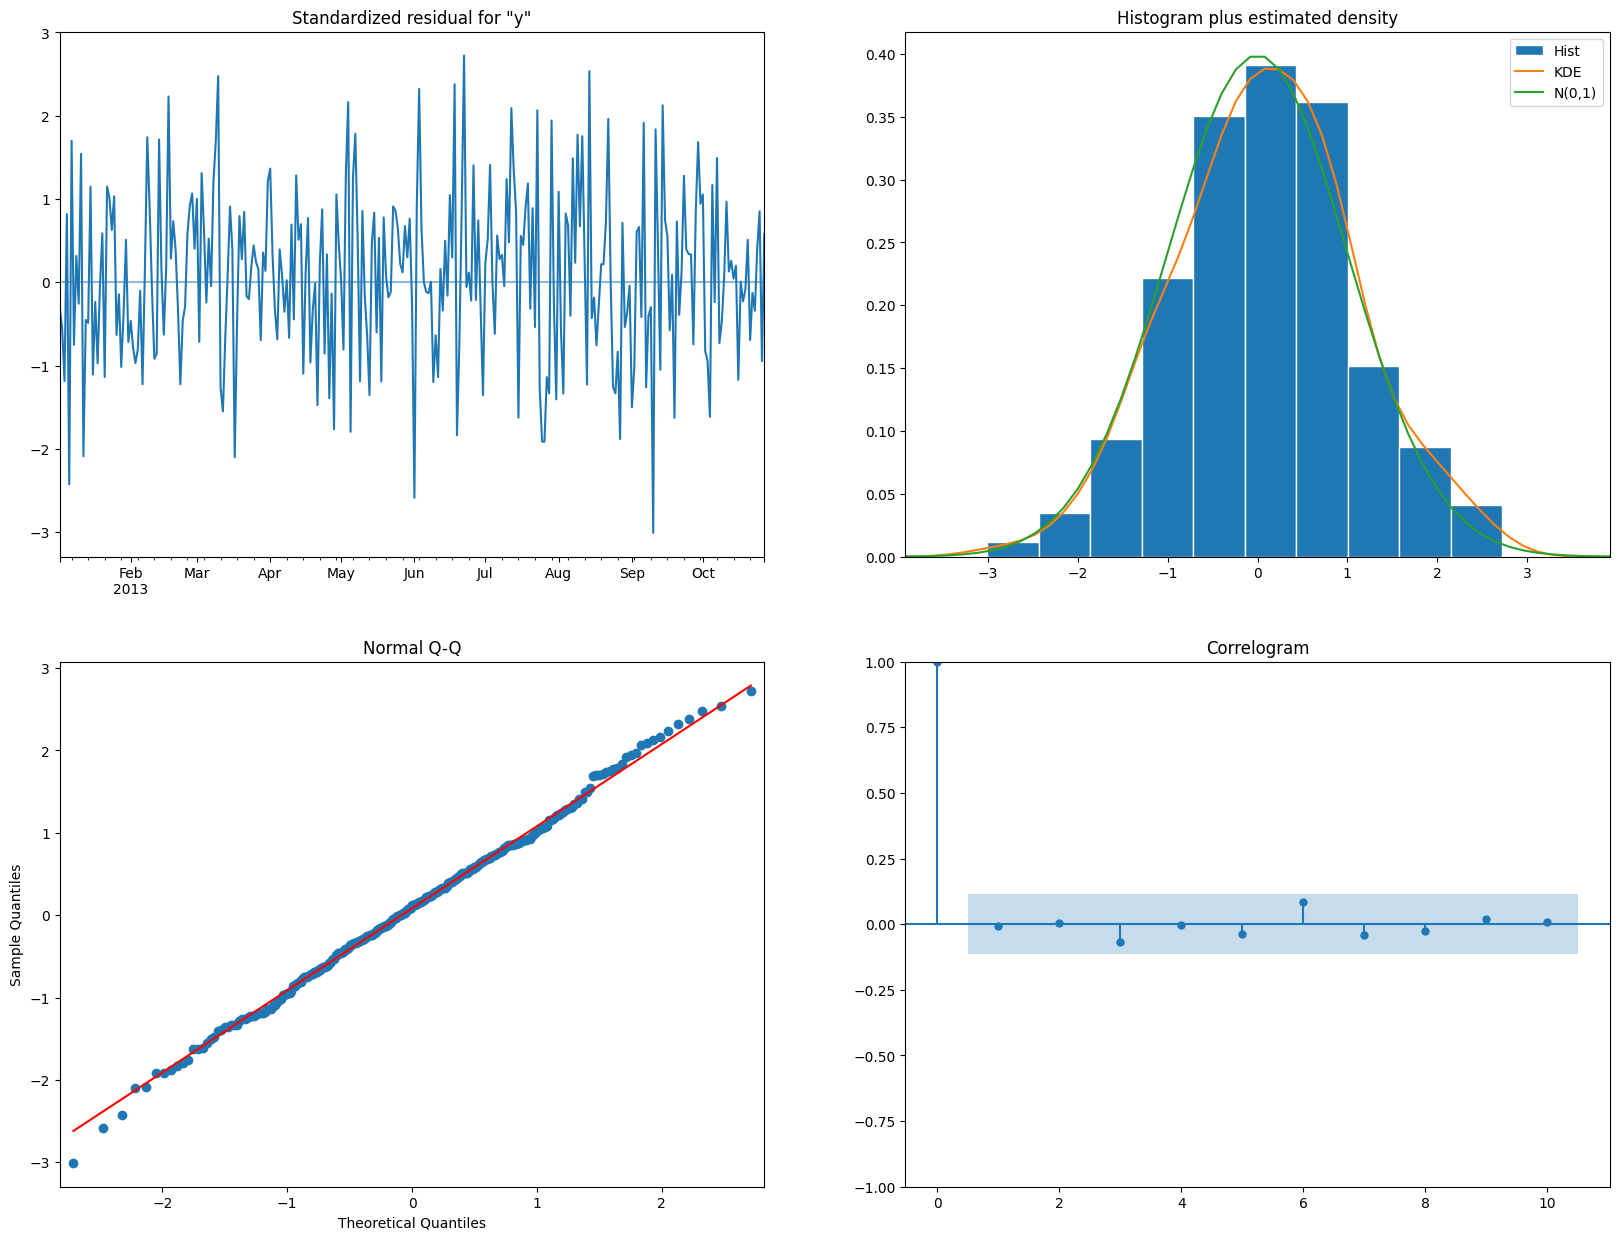

In [44]:
# Create and fit model
model = ARIMA(df, order=(1, 1, 1))
results=model.fit()

# Create the 4 diagostics plots
results.plot_diagnostics(figsize=(20, 15))
plt.show()


In [46]:
# Import augmented dicky-fuller test function
from statsmodels.tsa.stattools import adfuller

savings = pd.read_csv('.//savings.csv', parse_dates=True, index_col=[0])
savings.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102 entries, 1955-01-01 to 1980-04-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   savings  102 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


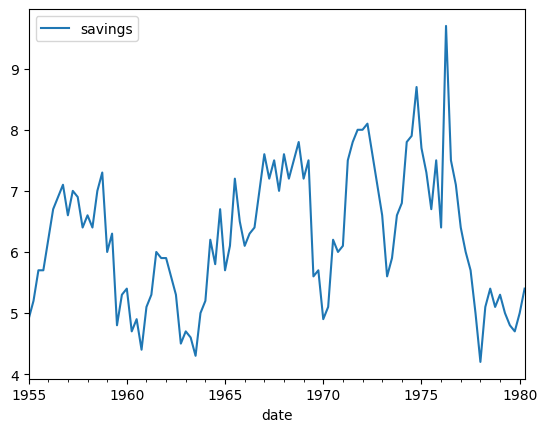

-3.185899096242141
0.020815541644114092


In [47]:


# Plot time series
savings.plot()
plt.show()

# Run Dicky-Fuller test
result = adfuller(savings['savings'])

# Print test statistics
print(result[0])

# Print p-value
print(result[1])

In [48]:
print(savings.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102 entries, 1955-01-01 to 1980-04-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   savings  102 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB
None


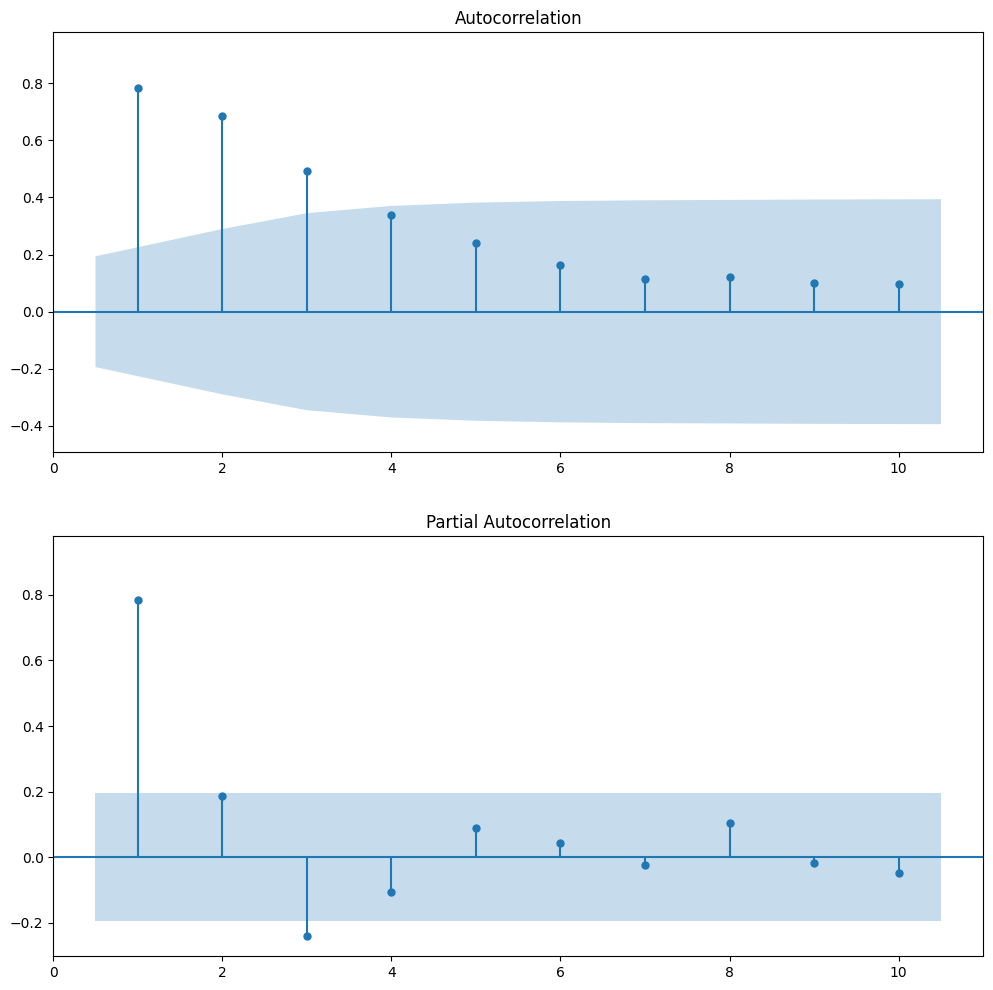

In [49]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,12))
 
# Plot the ACF of savings on ax1
plot_acf(savings, lags=10, zero=False, ax=ax1, auto_ylims=True)

# Plot the PACF of savings on ax2
plot_pacf(savings, lags=10, zero=False, ax=ax2, auto_ylims=True)

plt.show()

In [50]:
# Loop over p values from 0-3
for p in range(4):
    
    # Loop over q values from 0-3
    for q in range(4):
        try:
            # Create and fit ARMA(p, q) model
            model = SARIMAX(savings, order=(p, 0, q), trend='c')
            results = model.fit()
            
            # Print p, q, AIC, BIC
            print(p, q, results.aic, results.bic)
        except:
            print(p, q, None, None)

c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppDa

0 0 313.6028657326894 318.85281135925794
0 1 267.06970976886925 274.94462820872207
0 2 232.16782676455588 242.66771801769298
0 3 217.59720511188758 230.7220691783089
1 0 216.20348059024255 224.07839903009537


c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppDa

1 1 215.70038988616588 226.20028113930297
1 2 207.65298608433403 220.7778501507554
1 3 209.5749869160197 225.3248237957253
2 0 213.97232327543534 224.47221452857244


c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_da

2 1 213.430356791067 226.55522085748834
2 2 209.57903436788007 225.3288712475857
2 3 211.57503208880365 229.94984178179354
3 0 209.544931079116 222.66979514553736
3 1 210.82147634940847 226.57131322911408


c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppDa

3 2 211.45759881820476 229.83240851119464


c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


3 3 213.54389968397808 234.54368219025224


In [51]:
# Loop over p values from 0-3
for p in range(4):
    
    # Loop over q values from 0-3
    for q in range(4):
        try:
            # Create and fit ARMA(p, q) model
            model = ARIMA(savings, order=(p, 0, q), trend='c')
            results = model.fit()
            
            # Print p, q, AIC, BIC
            print(p, q, results.aic, results.bic)
        except:
            print(p, q, None, None)

c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppDa

0 0 313.6028657381061 318.85281136467466
0 1 267.06970980844704 274.94462824829986
0 2 232.167826773638 242.6677180267751
0 3 217.59720509753333 230.7220691639547
1 0 216.203479563773 224.0783980036258
1 1 215.7003889529165 226.2002802060536
1 2 207.65298384447473 220.77784791089607
1 3 209.57498315813814 225.32482003784378


c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppDa

2 0 213.97232199692382 224.47221325006092
2 1 213.4303586787603 226.55522274518165
2 2 209.57903144324058 225.32886832294622


c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregres

2 3 211.57498195129355 229.94979164428344
3 0 209.5449293671732 222.66979343359458
3 1 210.82147284903127 226.57130972873688


c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppDa

3 2 211.4575954849681 229.83240517795798
3 3 213.35650857574822 234.35629108202238


c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregres

c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                savings   No. Observations:                  102
Model:               SARIMAX(1, 0, 2)   Log Likelihood                 -98.826
Date:                Mon, 27 Nov 2023   AIC                            207.653
Time:                        10:31:41   BIC                            220.778
Sample:                    01-01-1955   HQIC                           212.968
                         - 04-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.6813      0.714      2.356      0.018       0.283       3.080
ar.L1          0.7286      0.111      6.538      0.000       0.510       0.947
ma.L1         -0.0539      0.145     -0.372      0.7

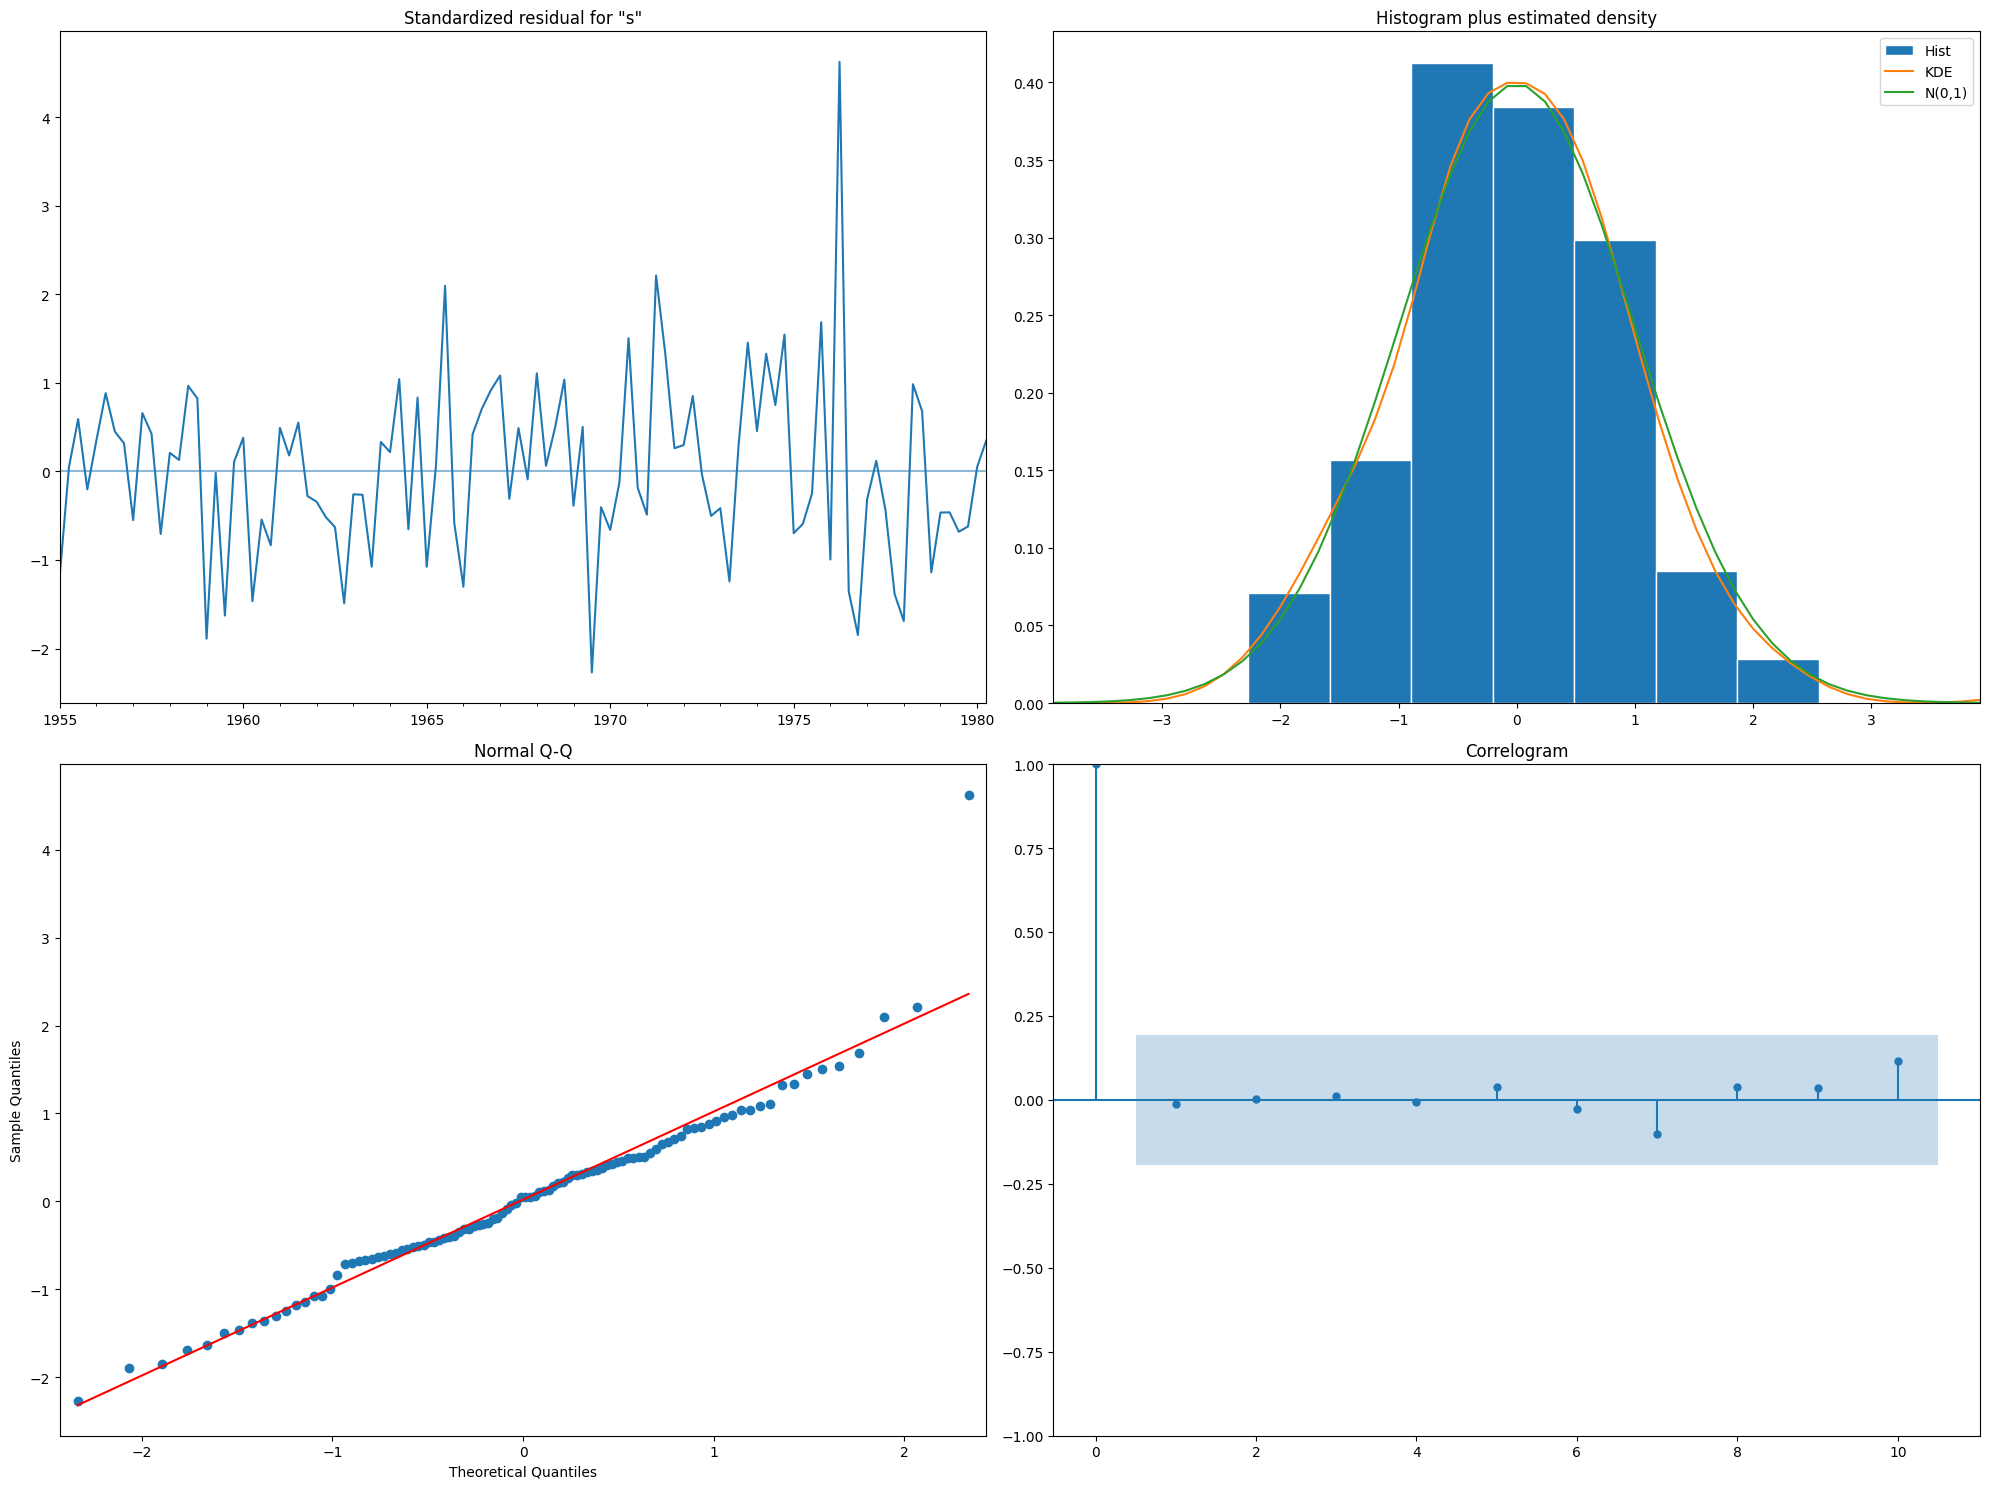

In [52]:
# Create and fit model
model = SARIMAX(savings, order=(1, 0, 2), trend='c')
results = model.fit()

# Create the 4 diagnostics plots
results.plot_diagnostics(figsize=(20, 15));
plt.tight_layout()

# Print summary
print(results.summary())

c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                savings   No. Observations:                  102
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 -98.826
Date:                Mon, 27 Nov 2023   AIC                            207.653
Time:                        10:55:22   BIC                            220.778
Sample:                    01-01-1955   HQIC                           212.968
                         - 04-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1949      0.323     19.169      0.000       5.561       6.828
ar.L1          0.7284      0.111      6.534      0.000       0.510       0.947
ma.L1         -0.0538      0.145     -0.370      0.7

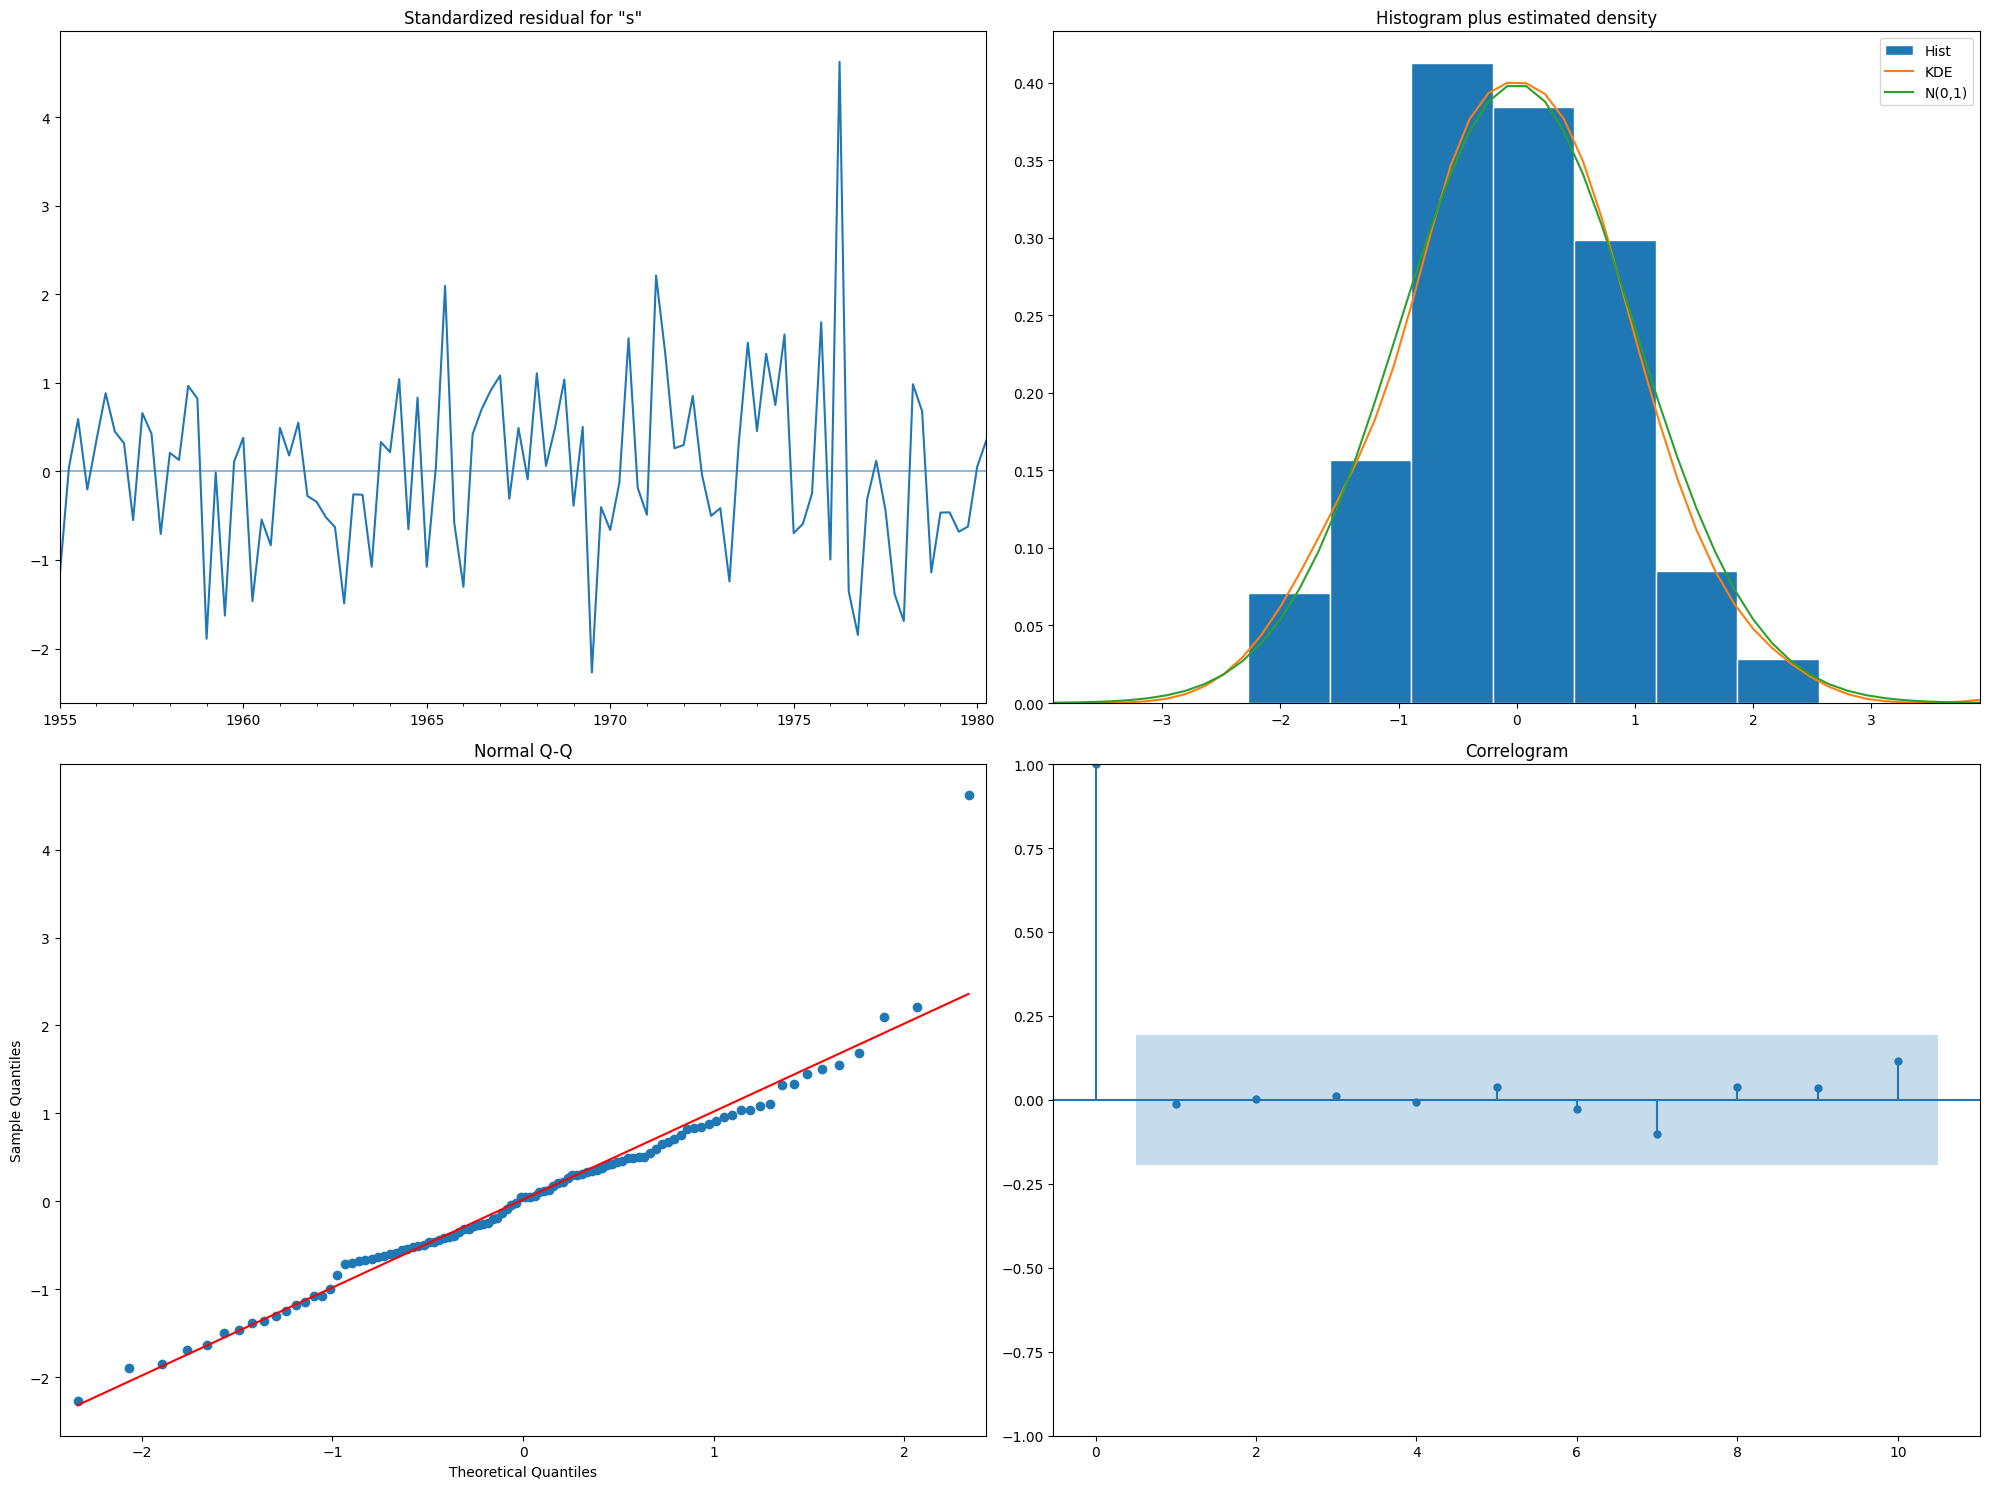

In [53]:
# Create and fit model
model = ARIMA(savings, order=(1, 0, 2), trend='c')
results = model.fit()

# Create the 4 diagnostics plots
results.plot_diagnostics(figsize=(20, 15));
plt.tight_layout()

# Print summary
print(results.summary())